In [29]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("./data/long-customer-train.csv")
test = pd.read_csv("./data/long-customer-test.csv")
short = pd.read_csv("./data/short-customer-data.csv")
data = pd.read_excel("./res/result1_2.xlsx")

In [3]:
train.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1


In [4]:
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0


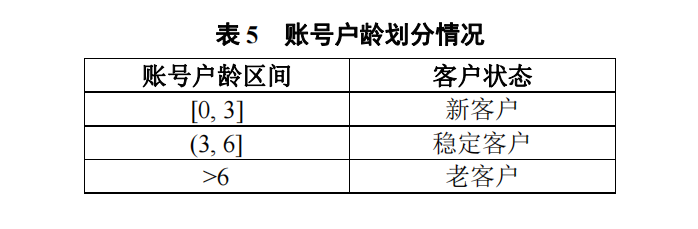

In [5]:
short

,user_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
0,BA2200001,56,housemaid,married,postgraduate,no,no,no,telephone,may,mon,261,nonexistent,no
1,BA2200002,57,services,married,high school,NaN,no,no,telephone,may,mon,149,nonexistent,no
2,BA2200077,37,services,married,high school,no,yes,no,telephone,may,mon,226,nonexistent,no
3,BA2200004,40,admin.,married,postgraduate,no,no,no,telephone,may,mon,151,nonexistent,no
4,BA2200005,56,services,married,high school,no,no,yes,telephone,may,mon,307,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,BA2241172,73,retired,married,junior college,no,yes,no,cellular,nov,fri,334,nonexistent,yes
41172,BA2241173,46,blue-collar,married,junior college,no,no,no,cellular,nov,fri,383,nonexistent,no
41173,BA2241174,56,retired,married,undergraduate,no,yes,no,cellular,nov,fri,189,nonexistent,no
41174,BA2241175,44,technician,married,junior college,no,no,no,cellular,nov,fri,442,nonexistent,yes


In [6]:
result = pd.DataFrame()

# 账号户龄划分

In [7]:
def age_con(x):
    if (0<=x)&(x<=3):
        return '新客户'
    elif (3<x)&(x<=6):
        return '稳定客户'
    else:
        return '老客户'
result['Status'] = data['Tenure'].apply(lambda x:age_con(x))

In [8]:
result['Status'] = data['Tenure'].apply(lambda x:age_con(x))

# 客户金融资产划分

In [9]:
def bla_con(x):
    if (0<=x)&(x<=50000):
        return '低资产'
    elif (50000<x)&(x<=90000):
        return '中下资产'
    elif (90000<x)&(x<=120000):
        return '中上资产'
    else:
        return '高资产'

In [10]:
result['AssetStage'] = data['Balance'].apply(lambda x:age_con(x))

In [11]:
result

,Status,AssetStage
0,新客户,老客户
1,老客户,新客户
2,老客户,老客户
3,新客户,新客户
4,新客户,新客户
...,...,...
9175,老客户,老客户
9176,老客户,老客户
9177,老客户,老客户
9178,新客户,老客户


In [12]:
result.to_excel("./res/result3.xlsx",encoding='utf-8',index=False)

C:\Users\dupeibo\Anaconda3\envs\pt\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [13]:
data['Status'] = data['Tenure'].apply(lambda x:age_con(x))
data['AssetStage'] = data['Balance'].apply(lambda x:bla_con(x))
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,AssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,新客户,高资产
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,老客户,低资产
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,老客户,中上资产
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,新客户,低资产
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,新客户,低资产
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0,老客户,中上资产
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0,老客户,高资产
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1,老客户,中上资产
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0,新客户,高资产


In [14]:
data.groupby("Status")['AssetStage'].count()

Status
新客户     3207
稳定客户    2742
老客户     3231
Name: AssetStage, dtype: int64

In [15]:
pd.DataFrame(data[data['Status']=='新客户'].groupby("AssetStage")['IsActiveMember'].value_counts())

IsActiveMember
AssetStage IsActiveMember                
中上资产       1                          372
           0                          355
中下资产       1                          172
           0                          126
低资产        1                          604
           0                          542
高资产        1                          564
           0                          472

In [16]:
pd.DataFrame(data[data['Status']=='老客户'].groupby("AssetStage")['IsActiveMember'].value_counts())

IsActiveMember
AssetStage IsActiveMember                
中上资产       1                          368
           0                          338
中下资产       1                          148
           0                          135
低资产        1                          620
           0                          585
高资产        0                          539
           1                          498

In [17]:
cor = pd.DataFrame(columns=['中上资产','中下资产','低资产','高资产'])

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,AssetStage
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1,新客户,高资产
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1,老客户,低资产
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1,老客户,中上资产
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1,新客户,低资产
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1,新客户,低资产
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0,老客户,中上资产
9176,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0,老客户,高资产
9177,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1,老客户,中上资产
9178,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0,新客户,高资产


In [30]:
data = {'中上资产':{'新客户':372,'老客户':368},
        '中下资产':{'新客户':172,'老客户':148},
        '低资产':{'新客户':604,'老客户':620},
        '高资产':{'新客户':564,'老客户':539}}
df = pd.DataFrame(data)
print(df)

     中上资产  中下资产  低资产  高资产
新客户   372   172  604  564
老客户   368   148  620  539


In [38]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小

df.corr()

,中上资产,中下资产,低资产,高资产
中上资产,1.0,1.0,-1.0,1.0
中下资产,1.0,1.0,-1.0,1.0
低资产,-1.0,-1.0,1.0,-1.0
高资产,1.0,1.0,-1.0,1.0


<AxesSubplot: >

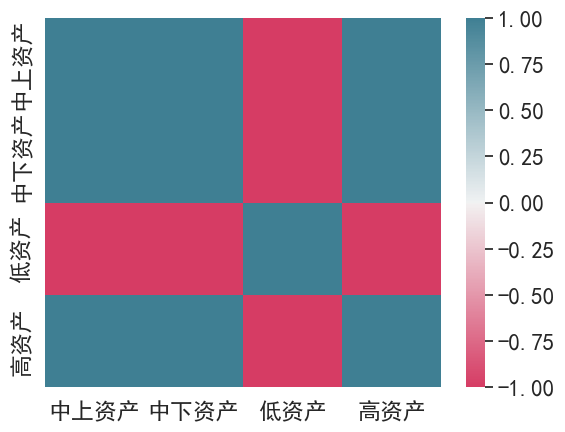

In [58]:
result = df.corr(method='pearson')
result.index = df.corr(method='pearson').index
cmap = sns.diverging_palette(2, 1300, as_cmap=True)
sns.heatmap(result,cmap=cmap)